# Pokemon

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
bar_data = pokemon['Type 1'].value_counts().reset_index()

In [ ]:
plt.bar(bar_data['index'], bar_data['Type 1'])
plt.xticks(rotation=90)
plt.xlabel('Ability')
plt.ylabel('Count')
plt.title("Abilities of Pokemons")



NameError: ignored

Text(0.5, 1.0, 'Abilities of Pokemons')

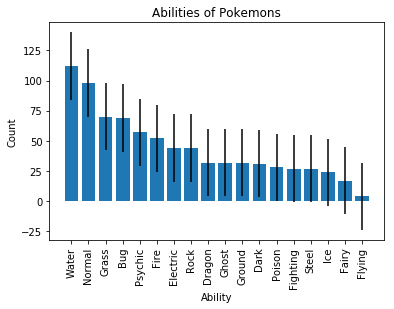

In [ ]:
bar_data['err'] = pokemon['Type 1'].value_counts().std()
plt.bar(bar_data['index'], bar_data['Type 1'], yerr=bar_data['err'])
plt.xticks(rotation=90)
plt.xlabel('Ability')
plt.ylabel('Count')
plt.title("Abilities of Pokemons")

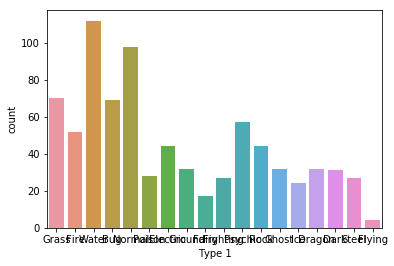

In [ ]:
sns.countplot(pokemon['Type 1'])

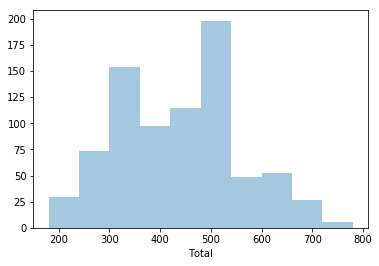

In [ ]:
sns.distplot(pokemon['Total'], bins=10, kde=False)

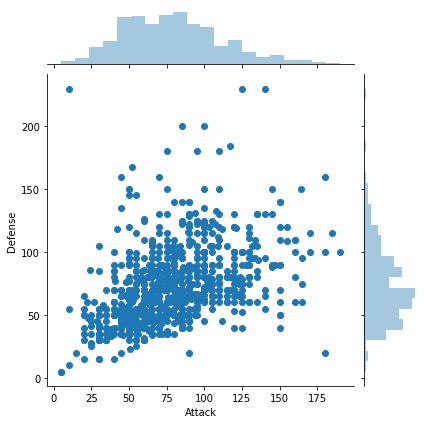

In [ ]:
sns.jointplot(x='Attack', y='Defense', data=pokemon)

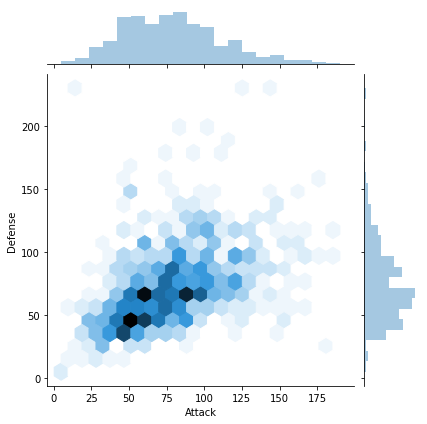

In [ ]:
sns.jointplot(x='Attack', y='Defense', data=pokemon, kind='hex', 
              gridsize=20)

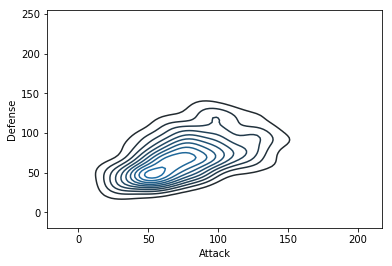

In [ ]:
sns.kdeplot(pokemon['Attack'], pokemon['Defense'])

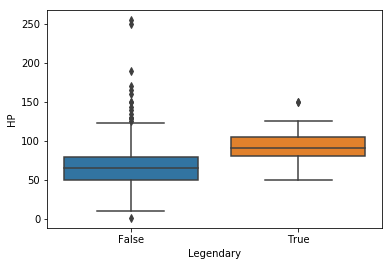

In [ ]:
sns.boxplot(
    x='Legendary',
    y='HP',
    data=pokemon
)

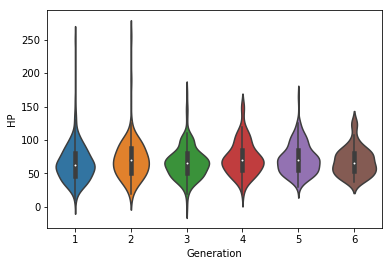

In [ ]:
sns.violinplot(
    x='Generation',
    y='HP',
    data=pokemon
)

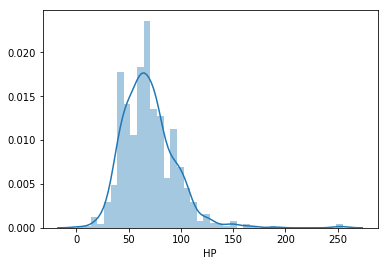

In [ ]:
sns.distplot(pokemon['HP'])

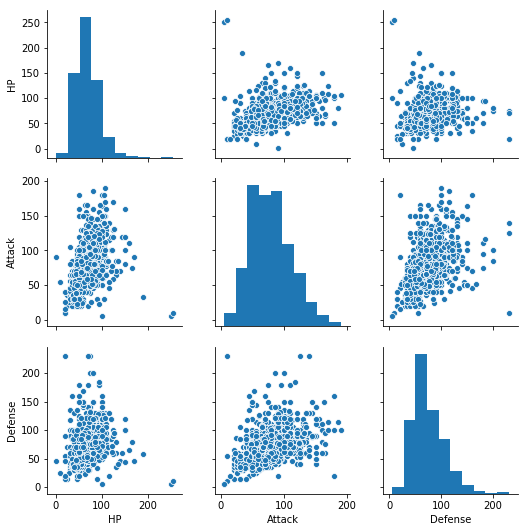

In [ ]:
sns.pairplot(pokemon[['HP', 'Attack', 'Defense']])

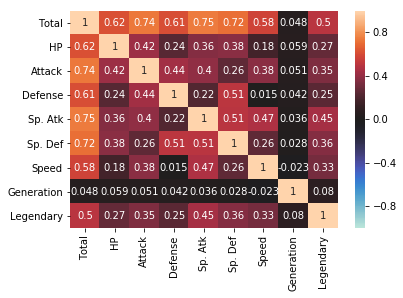

In [ ]:
sns.heatmap(pokemon.drop(['#'],1).corr(), annot = True, vmin=-1, vmax=1, center= 0)

C:\Users\diego.moreno\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


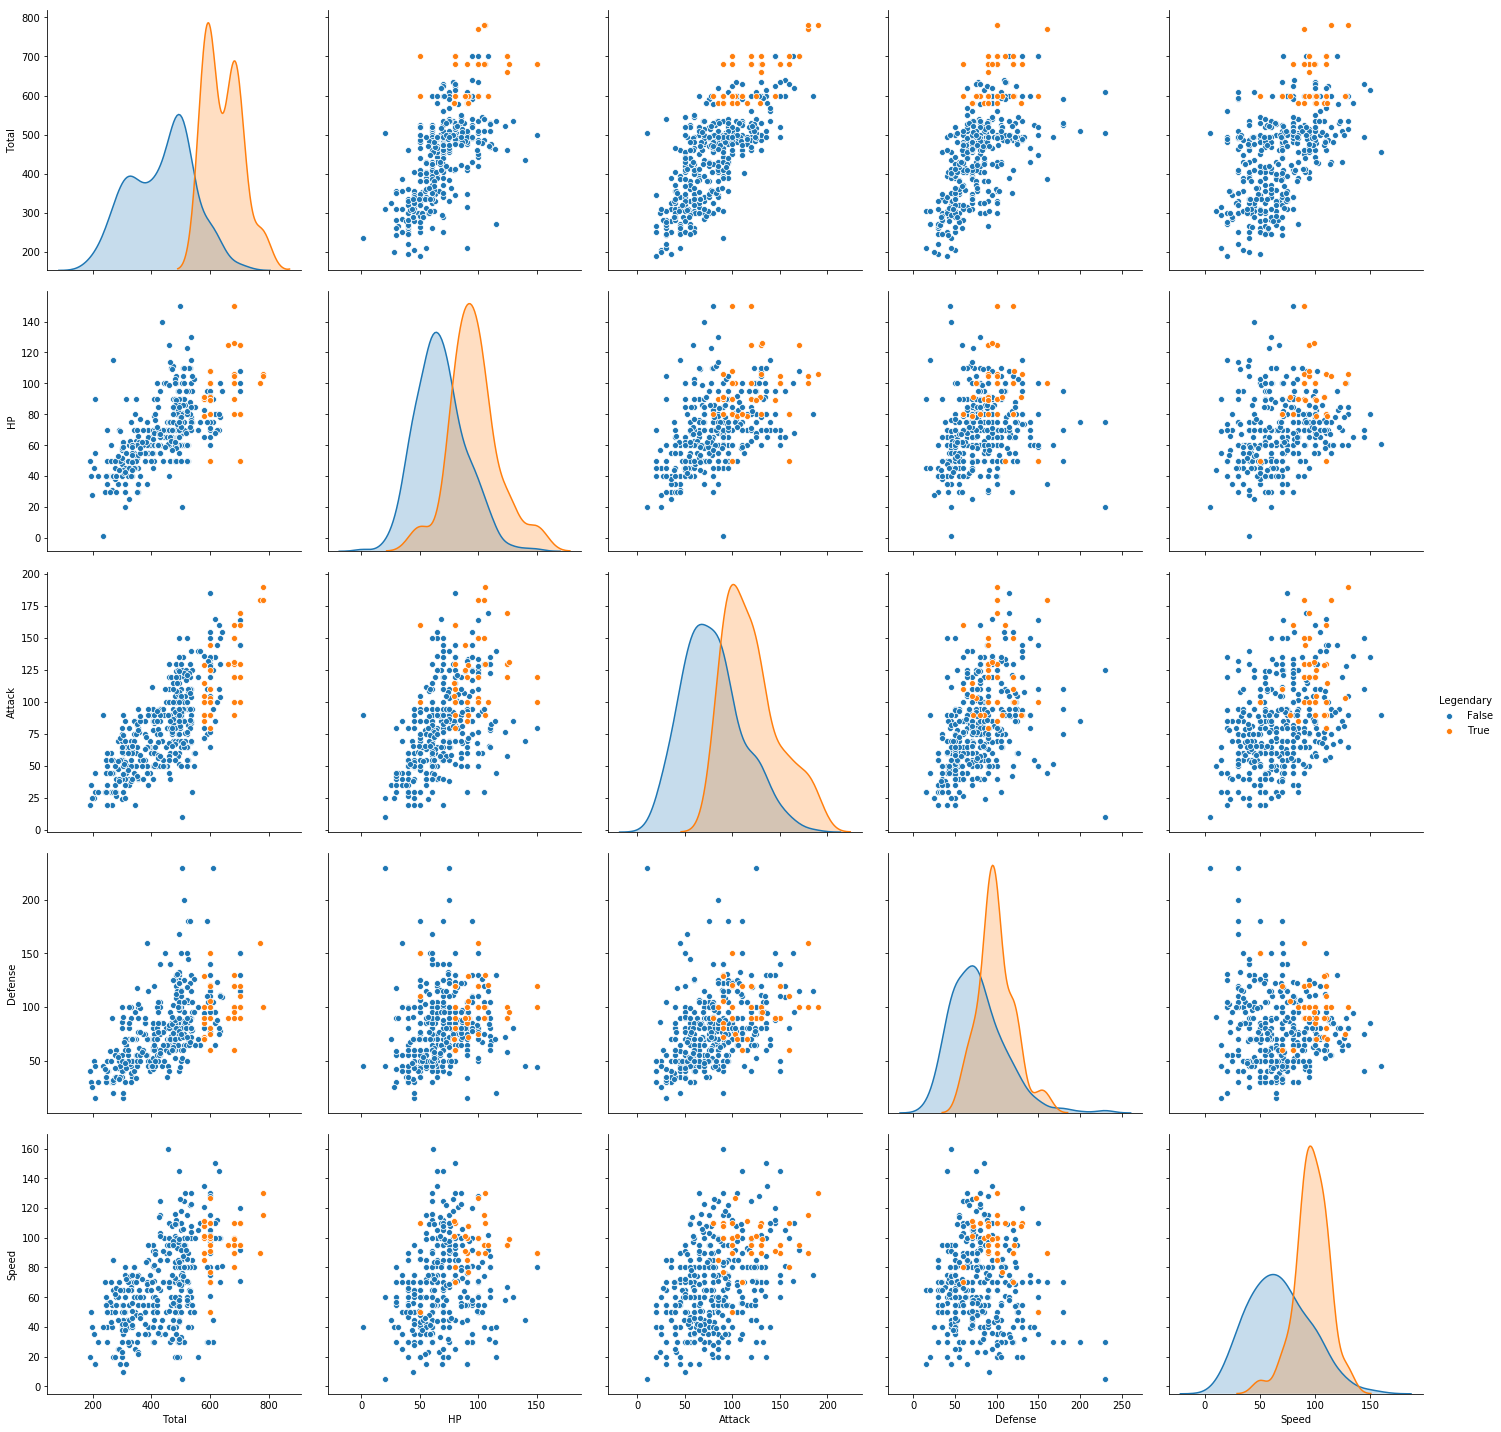

In [ ]:
sns.pairplot(pokemon.dropna(), hue='Legendary',size=4,vars=["Total", "HP", "Attack", "Defense", "Speed"],kind='scatter')

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
X = pokemon.iloc[:, 4:].values
X

array([[318, 45, 49, ..., 45, 1, False],
       [405, 60, 62, ..., 60, 1, False],
       [525, 80, 82, ..., 80, 1, False],
       ...,
       [600, 80, 110, ..., 70, 6, True],
       [680, 80, 160, ..., 80, 6, True],
       [600, 80, 110, ..., 70, 6, True]], dtype=object)

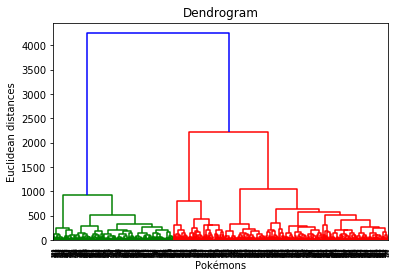

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Pokémons')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
print(scaled)

[[0.23       0.17322835 0.23783784 ... 0.22857143 0.         0.        ]
 [0.375      0.23228346 0.30810811 ... 0.31428571 0.         0.        ]
 [0.575      0.31102362 0.41621622 ... 0.42857143 0.         0.        ]
 ...
 [0.7        0.31102362 0.56756757 ... 0.37142857 1.         1.        ]
 [0.83333333 0.31102362 0.83783784 ... 0.42857143 1.         1.        ]
 [0.7        0.31102362 0.56756757 ... 0.37142857 1.         1.        ]]


C:\Users\diego.moreno\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


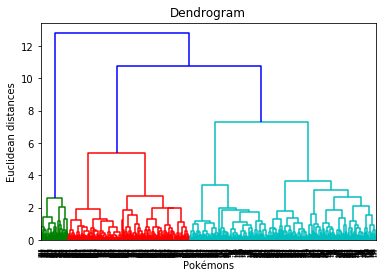

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(scaled, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Pokémons')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',   'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-0.403184,0.363568,0.139941
1,-0.228360,0.419321,0.009798
2,0.013460,0.496173,-0.171969
3,0.217355,0.557385,-0.333515
4,-0.410610,0.365417,0.147639


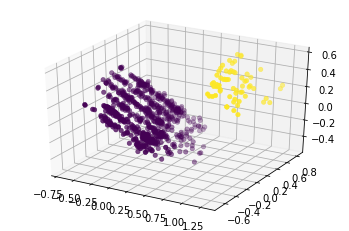

In [ ]:
principalDf['Legendary'] = pokemon['Legendary']
x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = principalDf['principal component 3']

ax = plt.axes(projection='3d')
ax.scatter(x,y,z, c=principalDf['Legendary'], cmap='viridis', linewidth=0.5);


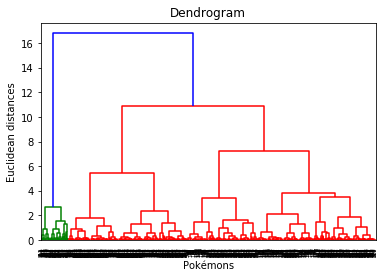

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(principalDf, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Pokémons')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [ ]:
X = principalDf.iloc[:, :-1]#.values

In [ ]:
y_hc=hc.fit_predict(X)

In [ ]:
principalDf['cluster'] = y_hc
principalDf.head()

,principal component 1,principal component 2,principal component 3,Legendary,cluster
0,-0.403184,0.363568,0.139941,False,0
1,-0.228360,0.419321,0.009798,False,0
2,0.013460,0.496173,-0.171969,False,0
3,0.217355,0.557385,-0.333515,False,0
4,-0.410610,0.365417,0.147639,False,0


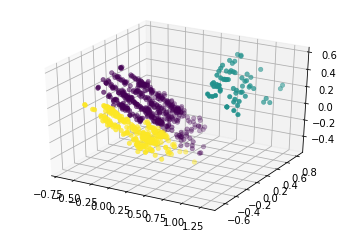

In [ ]:
principalDf['Legendary'] = pokemon['Legendary']
x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = principalDf['principal component 3']

ax = plt.axes(projection='3d')
ax.scatter(x,y,z, c=principalDf['cluster'], cmap='viridis', linewidth=0.5);



In [ ]:
pokemon['cluster'] = y_hc

C:\Users\diego.moreno\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


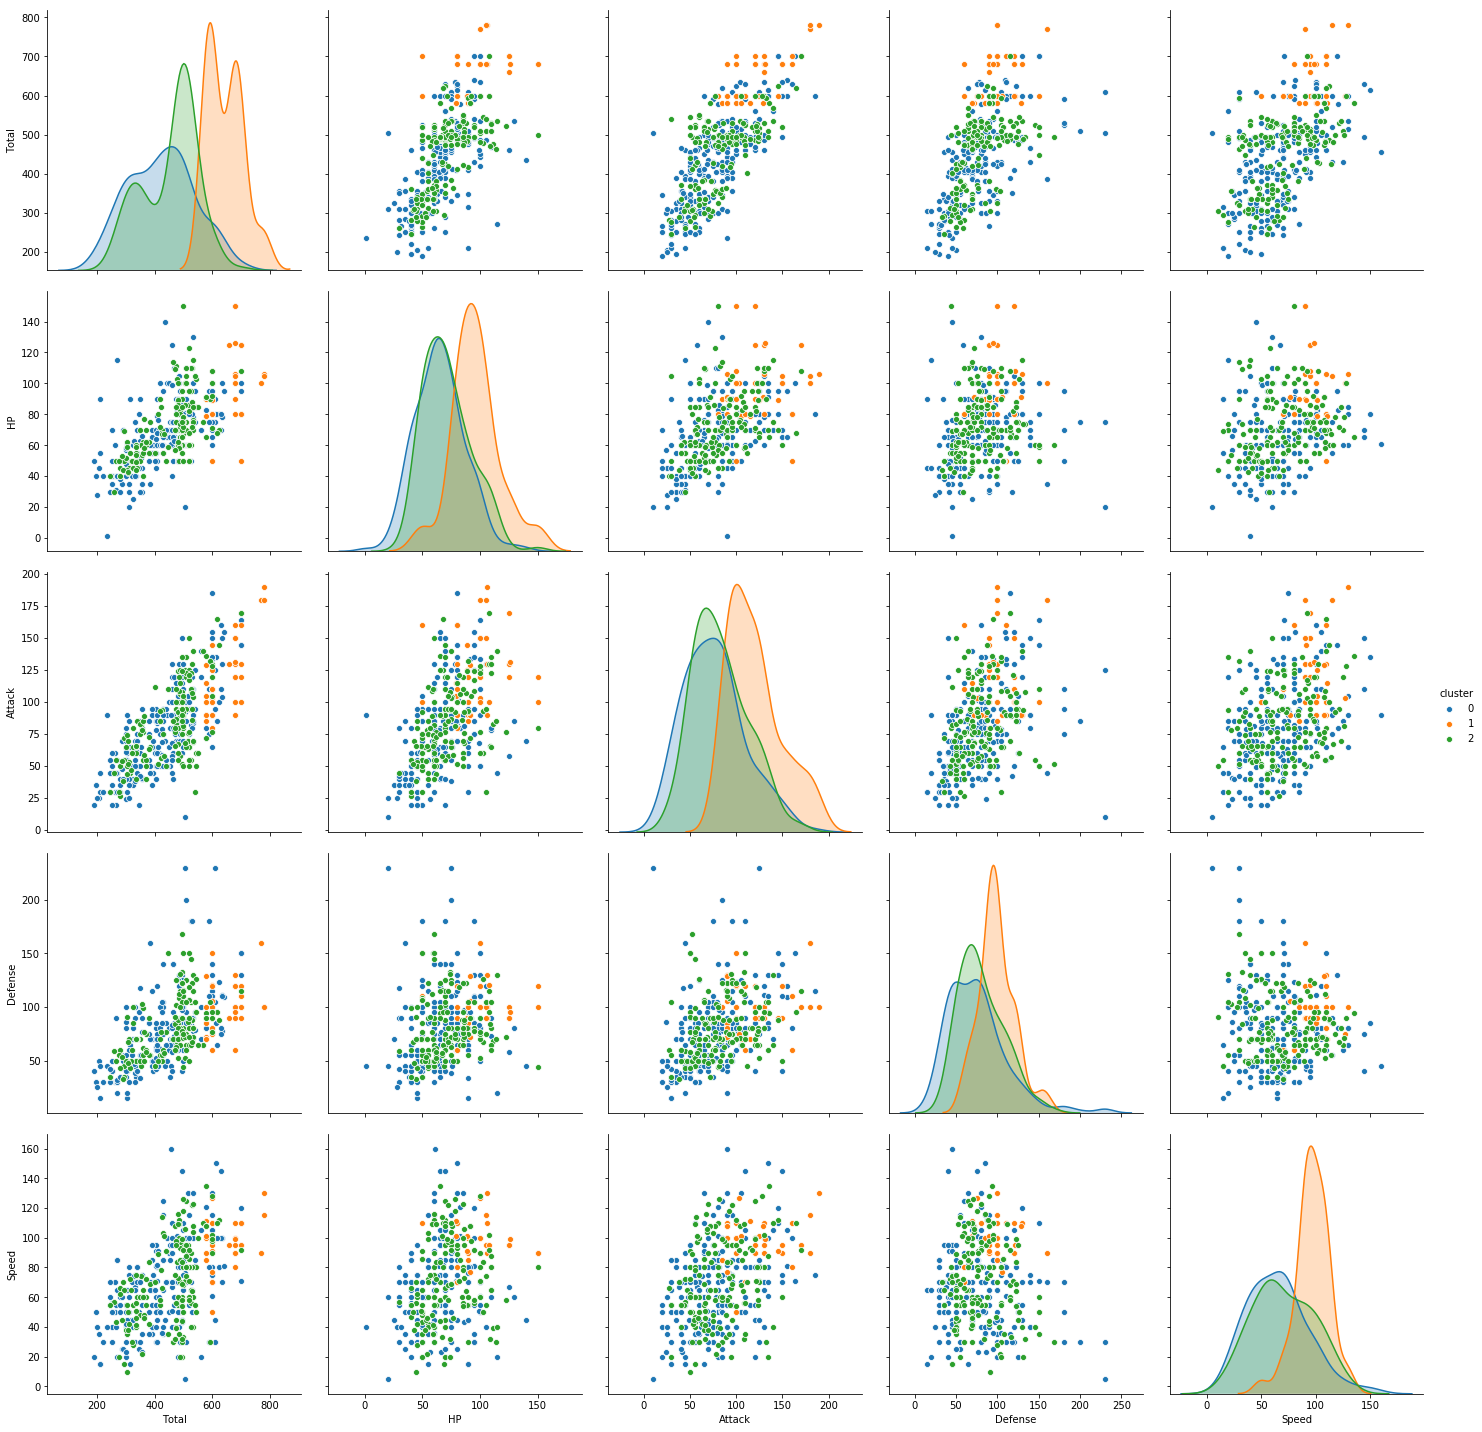

In [ ]:
sns.pairplot(pokemon.dropna(), hue='cluster',size=4,vars=["Total", "HP", "Attack", "Defense", "Speed"],kind='scatter')